In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data=np.random.randn(1000)

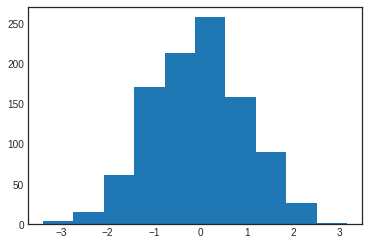

In [3]:
plt.hist(data)
plt.show()

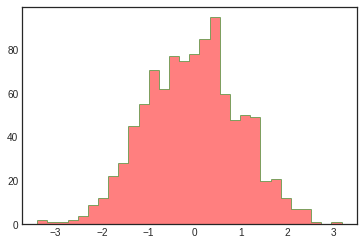

In [9]:
plt.hist(data,bins=30,alpha=0.5,
        histtype='stepfilled',color='red',
        edgecolor='Green')
plt.show()

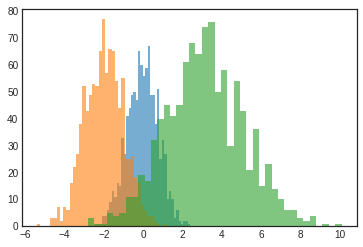

In [12]:
x1=np.random.normal(0,0.8,1000)
x2=np.random.normal(-2,1,1000)
x3=np.random.normal(3,2,1000)

kwargs=dict(histtype='stepfilled',alpha=0.6,bins=40)
plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)
plt.show()

In [14]:
counts,binedges=np.histogram(data,bins=5)
print(counts)
print(binedges)

[ 19 233 472 248  28]
[-3.39853225 -2.08516891 -0.77180557  0.54155776  1.8549211   3.16828444]


In [15]:
counts

array([ 19, 233, 472, 248,  28])

In [16]:
binedges

array([-3.39853225, -2.08516891, -0.77180557,  0.54155776,  1.8549211 ,
        3.16828444])

In [17]:
# Two dimensional histogram
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,10000).T

In [18]:
x

array([-0.22647706, -1.22567455, -1.73487824, ...,  0.40718979,
        0.49010419,  0.50747518])

In [19]:
y

array([-1.22534113, -2.16497469, -1.79433788, ..., -1.03338571,
        1.68065318,  0.25758223])

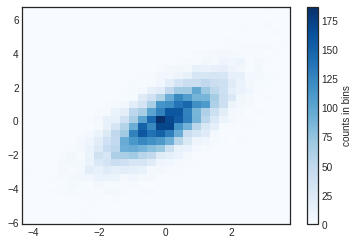

In [23]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb=plt.colorbar()
cb.set_label('counts in bins')
plt.show()

In [24]:
counts,xedges,yedges=np.histogram2d(x,y,bins=30)

In [27]:
# plt.hexbin(x,y,gridsize=30,cmap='blue')
# cb=plt.colorbar(label='Counts in Bins') # in this error you see all the colors


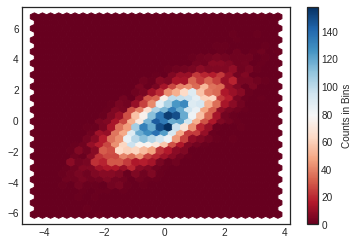

In [28]:
plt.hexbin(x,y,gridsize=30,cmap='RdBu')
cb=plt.colorbar(label='Counts in Bins')

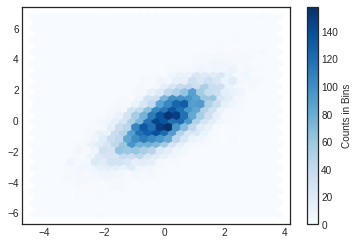

In [29]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb=plt.colorbar(label='Counts in Bins')

# Customizing Plot Legends

In [36]:
plt.style.use('classic')

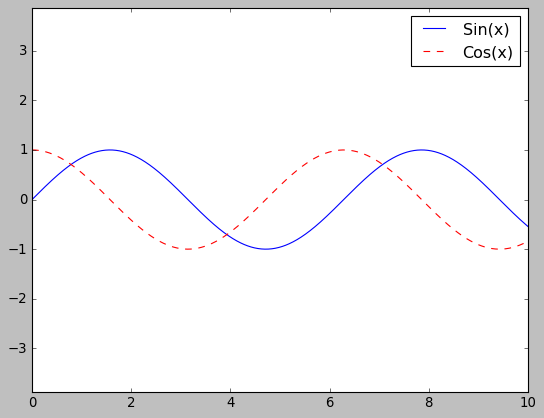

In [39]:
x=np.linspace(0,10,1000)
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sin(x)')
ax.plot(x,np.cos(x),'--r',label='Cos(x)')
ax.axis('equal')
leg=ax.legend()

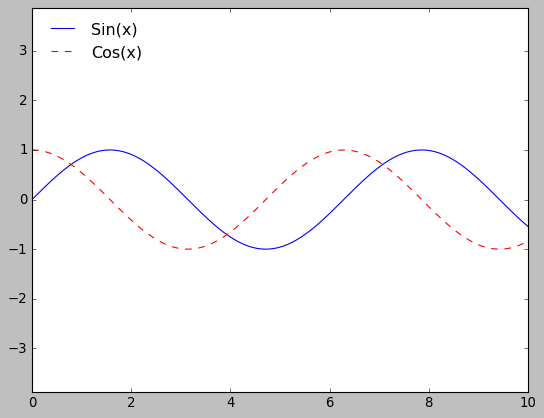

In [41]:
ax.legend(loc='upper left',frameon=False)
fig

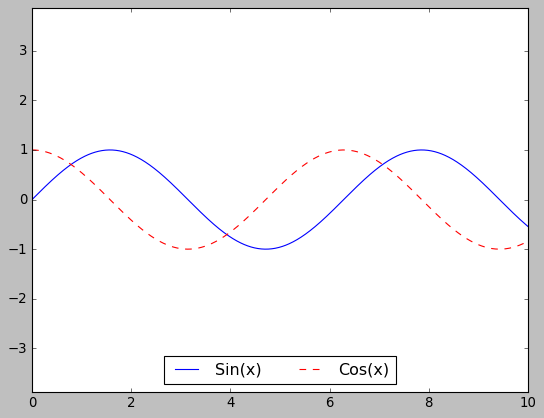

In [44]:
ax.legend(frameon=True,loc='lower center',ncol=2)
fig

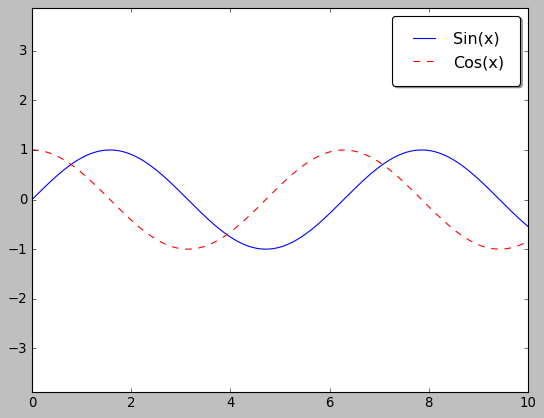

In [46]:
ax.legend(fancybox=True,framealpha=1,shadow=True,borderpad=1)
fig

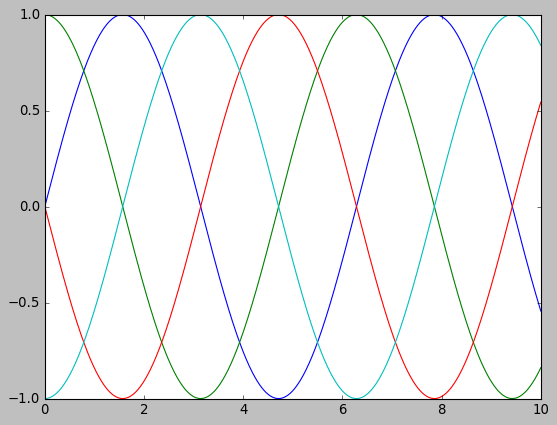

In [47]:
# Choosing elements for the legend
y=np.sin(x[:,np.newaxis]+np.pi*np.arange(0,2,0.5))
lines=plt.plot(x,y)


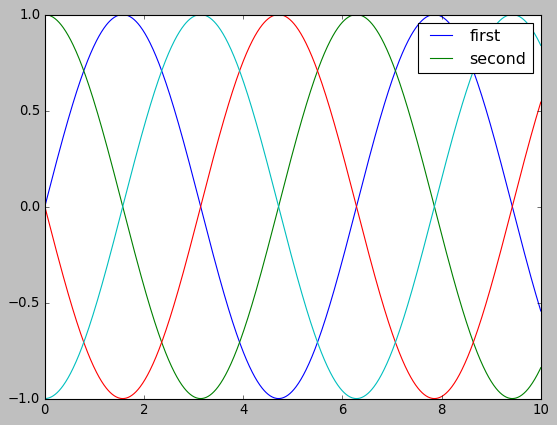

In [48]:
y=np.sin(x[:,np.newaxis]+np.pi*np.arange(0,2,0.5))
lines=plt.plot(x,y)
# lines is a list of plt.line2d instaces
plt.legend(lines[:2],['first','second'])

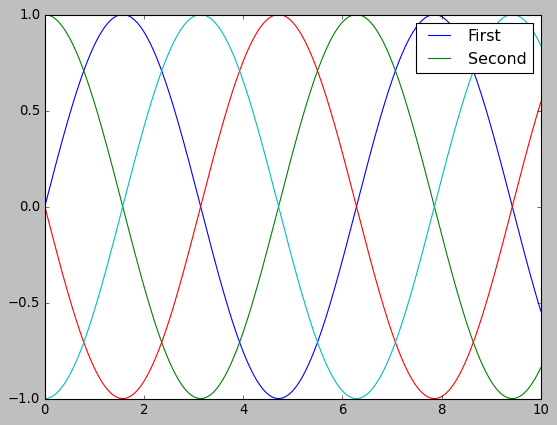

In [52]:
plt.plot(x,y[:,0],label='First')
plt.plot(x,y[:,1],label='Second')
plt.plot(x,y[:,2:])
plt.legend(framealpha=1,frameon=True)

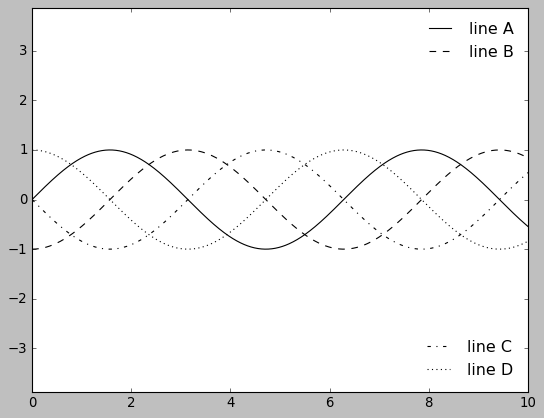

In [54]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg)

# CUSTOMIZING COLORBARS
# =======================

In [55]:
plt.style.use('classic')

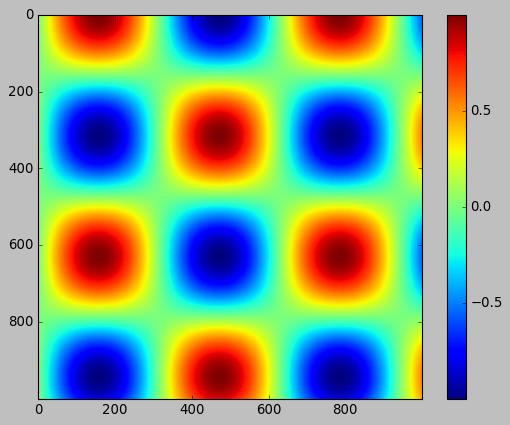

In [60]:
x=np.linspace(0,10,1000)
i=np.sin(x)*np.cos(x[:,np.newaxis])

plt.imshow(i)
plt.colorbar()

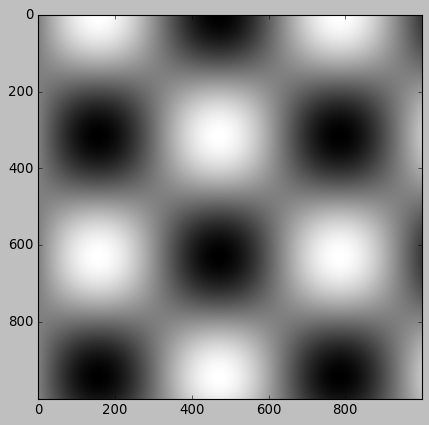

In [61]:
plt.imshow(i,cmap='gray')

In [62]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

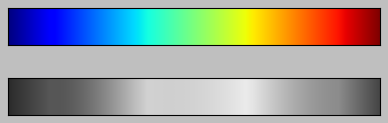

In [63]:
view_colormap('jet')

In [64]:
# the colors you can use and see
# view_colormap('jets')

ValueError: 'jets' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

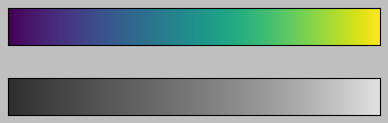

In [65]:
view_colormap('viridis')

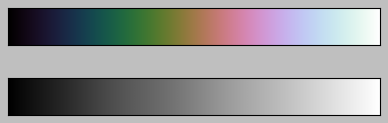

In [67]:
view_colormap('cubehelix')

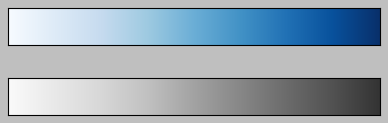

In [68]:
view_colormap('Blues')

# Color limits and extensions

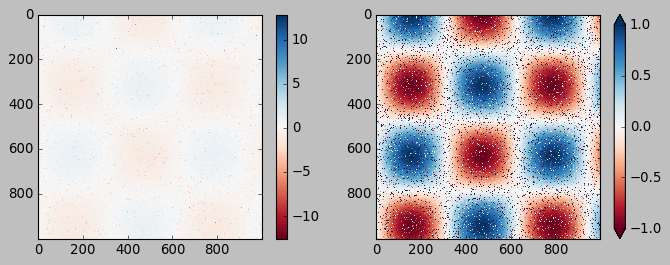

In [75]:
# maek noise in 1% of the image pixels
speckles=(np.random.random(i.shape)<0.01)
i[speckles]=np.random.normal(0,3,np.count_nonzero(speckles))
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.imshow(i,cmap='RdBu')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(i,cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

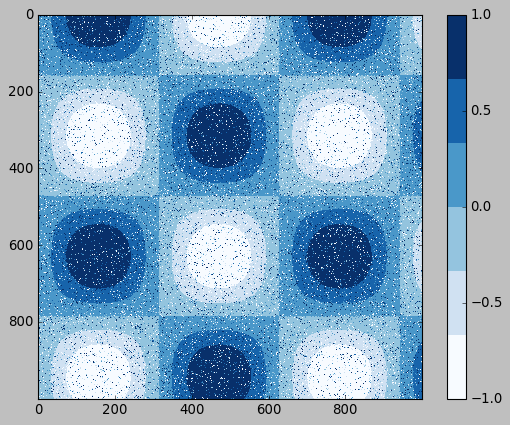

In [81]:
plt.imshow(i,cmap=plt.cm.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,1)

# MULTIPLE SUBPLOTS
# =================

In [83]:
plt.style.use('seaborn-white')

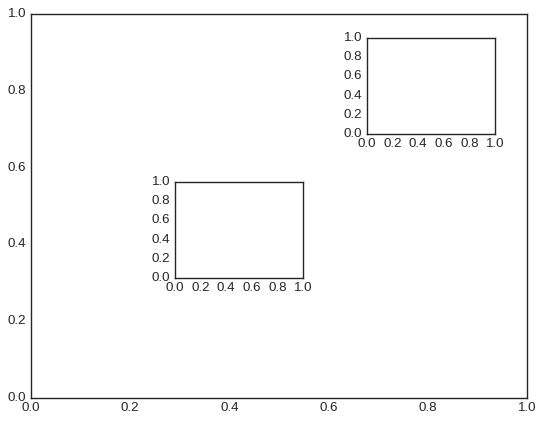

In [86]:
ax1=plt.axes() # this is standard axes
ax2=plt.axes([0.65,0.65,0.2,0.2])
ax2=plt.axes([0.35,0.35,0.2,0.2])

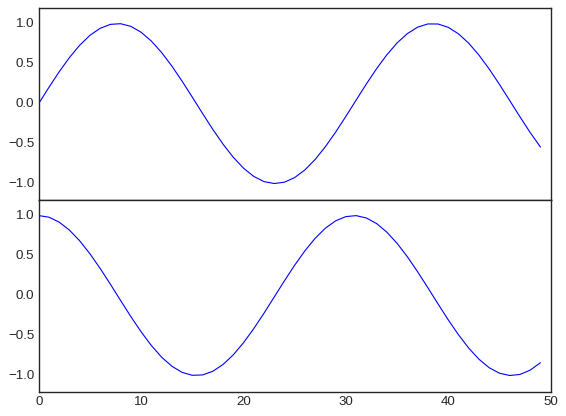

In [89]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.5,0.8,0.4],
                xticklabels=[],ylim=(-1.2,1.2))
ax2=fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))

x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

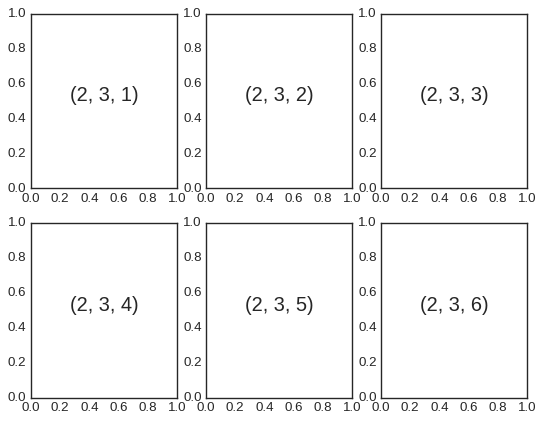

In [90]:
# Simple Grids
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
            fontsize=18,ha='center')

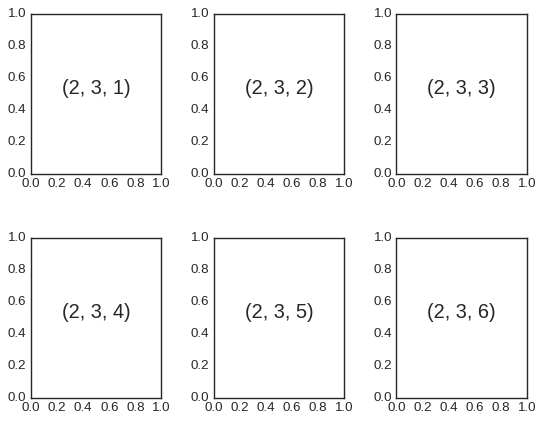

In [91]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),
           fontsize=18,ha='center')

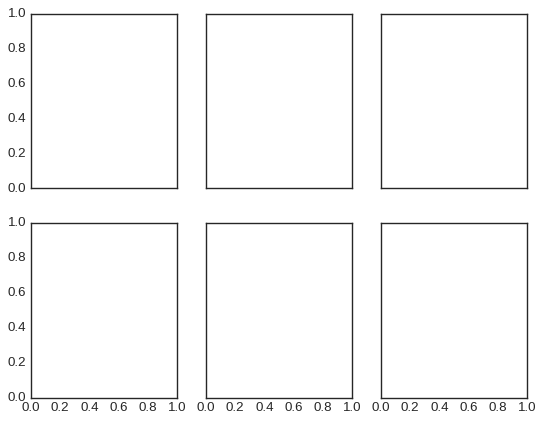

In [92]:
fig,ax=plt.subplots(2,3,sharex='col',sharey='row')

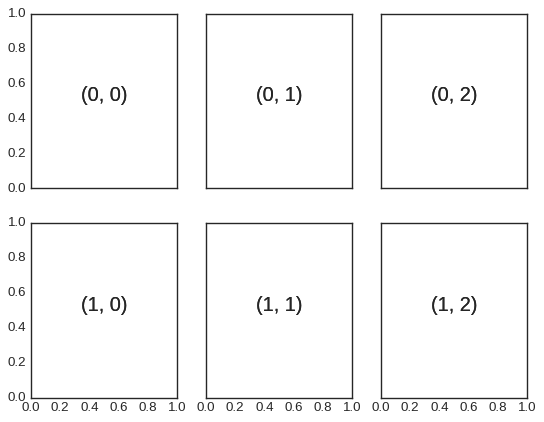

In [94]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize=18,ha='center')
fig

In [95]:
grid=plt.GridSpec(2,3,wspace=0.4,hspace=0.3)

<AxesSubplot:>

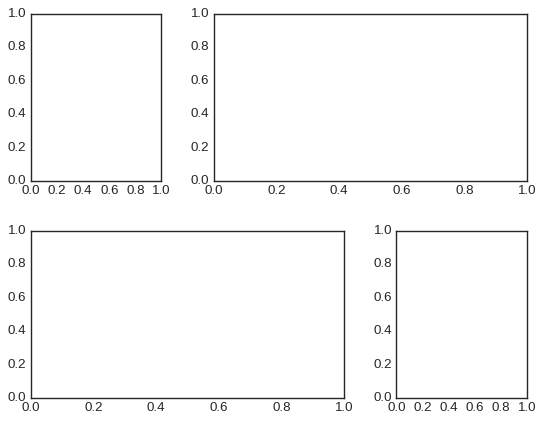

In [96]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

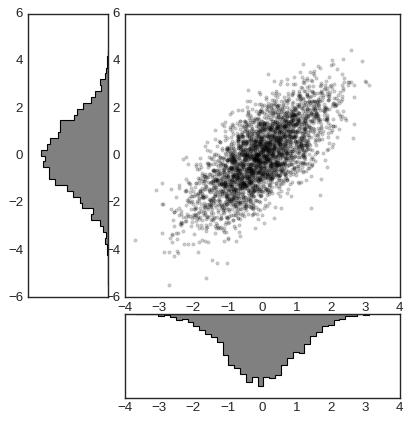

In [97]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()